In [1]:
# Load Libraries
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import make_blobs
from matplotlib import pyplot

In [2]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

In [3]:
# one hot encode output variable
y = to_categorical(y)

In [4]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [5]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [6]:
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [7]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0,
batch_size=32)

In [8]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)


Train: 0.816, Test: 0.824


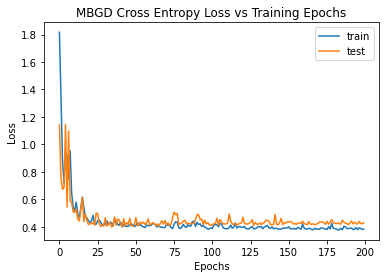

In [9]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
# show the plot
pyplot.title("MBGD Cross Entropy Loss vs Training Epochs")
pyplot.xlabel("Epochs")
pyplot.ylabel("Loss")
pyplot.legend()
pyplot.show()

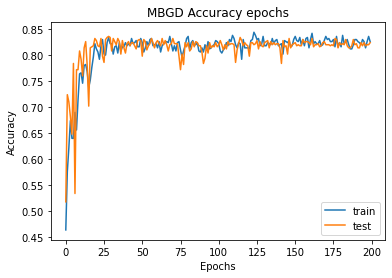

In [10]:
# plot accuracy learning curves

pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')

pyplot.title("MBGD Accuracy epochs")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.legend()
pyplot.show()

In [11]:
!jupyter nbconvert --to script mini_batch_gradient_descent_classification.ipynb

[NbConvertApp] Converting notebook mini_batch_gradient_descent_classification.ipynb to script
[NbConvertApp] Writing 2061 bytes to mini_batch_gradient_descent_classification.py
